# 数据清洗

数据清洗是数据挖掘模型建立过程中很重要的一步 [数据清理方法1](https://mp.weixin.qq.com/s?src=11&timestamp=1589115099&ver=2330&signature=LLmtCeoOlWJGJw6whD1lIZxNuC93vUmldPAeb8tMc0GVfhg0CKqwfJqM1ygp8YhqiawmCqZMl37kI0chfTJEwkFBElIIAZL8ppOM*Akk-18U0eFNKQdJifVDQ7bu**tW&new=1) [数据清理方法2](https://zhuanlan.zhihu.com/p/40775756)

通过填写缺失的值，光滑噪声数据，识别或删除离群点，并解决不一致性来“清理”数据。如果用户认为数据是脏的，则他们可能不会相信这些数据上的挖掘结果。此外，脏数据可能使挖掘过程陷入混乱，导致不可靠的输出。

## 缺失值

- **忽略元组：**当缺少类标号时通常这样做（假定挖掘任务涉及分类）。除非元组有多个属性缺少值，否则该方法不是很有效。当每个属性缺失值的百分比变化很大时，它的性能特别差。采用忽略元组，你不能使用该元组的剩余属性值。这些数据可能对手头的任务是有用的。
- **人工填写缺失值：**一般来说，该方法很费时，并且当数据集很大、确实很多值时，该方法可能行不通。
- **使用一个全局常量填充缺失值：**将缺失的属性值用同一个常量（如 "Unknown" 或 $-\infty$）替换。如果缺失值都用 "Unknown" 替换，则挖掘程序可能误以为他们形成了一个有趣的概念，因为它们都具有相同的值—— "Unknown" 。因此，尽管该方法简单，但并不十分可靠。
- **使用属性的中心度量（如均值或中位数）填充缺失值：**均值等中心趋势度量，指示数据分布的“中间”值。对于正常的（对称的）数据分布而言，可以使用均值，而倾斜数据分布应该使用中位数。例如，收入的数据是对称的，并且平均收入为 56,000 美元，则使用该值替换收入属性中的缺失值。
- **使用与给定元组属同一类的所有样本的属性均值或中位数：**例如，将顾客按信用等级分类，则用具有相同信用风险的顾客的平均收入替换收入属性中的缺失值。如果给定类的数据分布是倾斜的，则中位数是更好的选择。
- **使用最可能的值填充缺失值：**可以用回归、使用贝叶斯形式化方法的基于推理的工具或决策树归纳确定。例如，利用数据集中其他顾客的属性，可以构造一颗决策树，来预测收入的缺失值。


![flow_chart](hw3.jpg)

## 噪声数据

**噪声**是被测量的变量的随机误差或方差。

数据光滑技术：
- **分箱：**通过考察数据的“近邻”（即周围的值）来光滑有序数据值。这些有序的值被分布到一些“桶”或箱中。由于分箱方法考察临近的值，因此它进行局部光滑。
- **回归：**可以用一个函数拟合数据来光滑数据。
- **离群点分析：**可以通过如聚类来检测离群点。聚类将类似的值组织成群或“簇”。

# 采用删除和填补两种方法进行清洗数据

In [1]:
import pandas as pd 

In [2]:
data=pd.read_csv("homework_3.csv")

In [3]:
data

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,NaN,0.2,setosa
2,4.7,3.2,NaN,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.1,3.8,NaN,0.2,setosa
5,4.6,3.2,1.4,0.2,setosa
6,5.3,NaN,1.5,0.2,setosa
7,5.0,3.3,1.4,0.2,setosa
8,7.0,3.2,4.7,1.4,versicolor
9,6.4,3.2,NaN,1.5,versicolor


In [4]:
data.describe()

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width
count,14.000000,14.000000,9.000000,15.000000
mean,5.500000,3.171429,3.177778,0.973333
std,0.775589,0.267261,2.090322,0.889194
min,4.600000,2.700000,1.400000,0.200000
25%,4.925000,3.000000,1.400000,0.200000
50%,5.200000,3.200000,1.500000,0.200000
75%,6.200000,3.275000,5.100000,1.800000
max,7.000000,3.800000,6.000000,2.500000


In [8]:
data.isnull().sum().sort_values(ascending=False)

Pepal.Length    6
Sepal.Width     1
Sepal.Length    1
Species         0
Pepal.Width     0
dtype: int64

In [8]:
a=data.dropna(how = 'all')
a

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,NaN,0.2,setosa
2,4.7,3.2,NaN,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.1,3.8,NaN,0.2,setosa
5,4.6,3.2,1.4,0.2,setosa
6,5.3,NaN,1.5,0.2,setosa
7,5.0,3.3,1.4,0.2,setosa
8,7.0,3.2,4.7,1.4,versicolor
9,6.4,3.2,NaN,1.5,versicolor


## 删除

In [10]:
# 删除 nan 所在行
data1=data.dropna()
data1

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
5,4.6,3.2,1.4,0.2,setosa
7,5.0,3.3,1.4,0.2,setosa
8,7.0,3.2,4.7,1.4,versicolor
10,6.3,3.3,6.0,2.5,virginica
11,5.8,2.7,5.1,1.9,virginica
13,6.3,2.9,5.6,1.8,virginica


In [13]:
# 删除 nan 所在列
data2=data.dropna(axis=1)
data2

,Pepal.Width,Species
0,0.2,setosa
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
4,0.2,setosa
5,0.2,setosa
6,0.2,setosa
7,0.2,setosa
8,1.4,versicolor
9,1.5,versicolor


## 填补

In [14]:
# 用0填充缺省值
data3=data.fillna(0)
data3

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,0.0,0.2,setosa
2,4.7,3.2,0.0,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.1,3.8,0.0,0.2,setosa
5,4.6,3.2,1.4,0.2,setosa
6,5.3,0.0,1.5,0.2,setosa
7,5.0,3.3,1.4,0.2,setosa
8,7.0,3.2,4.7,1.4,versicolor
9,6.4,3.2,0.0,1.5,versicolor


In [15]:
# 用上一个数据填充缺省值
data4=data.fillna(method="pad")
data4

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.1,3.8,1.5,0.2,setosa
5,4.6,3.2,1.4,0.2,setosa
6,5.3,3.2,1.5,0.2,setosa
7,5.0,3.3,1.4,0.2,setosa
8,7.0,3.2,4.7,1.4,versicolor
9,6.4,3.2,4.7,1.5,versicolor


In [16]:
# 用平均值填充缺省值
data5=data.fillna(data.mean())
data5

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width,Species
0,5.1,3.500000,1.400000,0.2,setosa
1,4.9,3.000000,3.177778,0.2,setosa
2,4.7,3.200000,3.177778,0.2,setosa
3,4.6,3.100000,1.500000,0.2,setosa
4,5.1,3.800000,3.177778,0.2,setosa
5,4.6,3.200000,1.400000,0.2,setosa
6,5.3,3.171429,1.500000,0.2,setosa
7,5.0,3.300000,1.400000,0.2,setosa
8,7.0,3.200000,4.700000,1.4,versicolor
9,6.4,3.200000,3.177778,1.5,versicolor


# 回归方法填补数据

## 背景描述：
数据清洗过程中经常会遇到异常值和缺失值等问题，有时候，会把异常值看作缺失值来处理。一般的缺失值处理方法包括：删除、统计值充填（均值、中位数等）、回归方程预测充填等。
使用直接删除这种方法简单易行，但缺点是，在记录数据较少的情况下，会造成样本量的进一步减少，可能会改变响应变量的原有分布，造成分析结果不准确。因此，将异常值视为缺失值来处理的益处在于可以利用现有变量的信息进行建模挖掘，对异常值（缺失值）进行填补。

## 应用场景：
**回归方程充填法**是选择若干能预测缺失值的自变量，通过建立回归方程估算缺失值。

该方法能尽可能地利用原数据集中的信息，但也存在一些不足之处：
- 虽然这是一个无偏估计，但会忽视随机误差，低估标准差和其他未知性质的测量值；
- 使用前，必须假设存在缺失值所在的变量与其他变量是存在线性关系的,但现实它们不一定存在这样的线性关系，这可以借助统计工具来辨析，但往往更需要建模人员的实践经验和业务知识来进行分析和判断。

## 方法步骤：
- 确定充填缺失值的变量（特征列）
- 拆分原始数据集：
根据需要充填缺失值的变量，把原始数据集拆分为2个子集
    - 不含有缺失值：dataset_train 
    - 只含有缺失值：dataset_pred

- 辨析并检验相关变量的相关性：
经验分析判定与充填缺失值的变量相关的属性列有哪些，应用统计分析工具，在dataset_train数据集上查看验证所选择的属性列之间的相关性。

- 建模并预测：
使用dataset_train数据集建立线性回归模型，并应用建好的模型对dataset_pred数据集中的缺失变量进行预测估计

- 合并还原数据集：
将两个子集合并还原为一个数据集，为后续建模准备好数据。

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
Sepal.Length    14 non-null float64
Sepal.Width     14 non-null float64
Pepal.Length    9 non-null float64
Pepal.Width     15 non-null float64
Species         15 non-null object
dtypes: float64(4), object(1)
memory usage: 728.0+ bytes


In [20]:
data.isnull().sum().sort_values(ascending=False)

Pepal.Length    6
Sepal.Width     1
Sepal.Length    1
Species         0
Pepal.Width     0
dtype: int64

In [6]:
dataset_train=data.dropna()
dataset_train

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
5,4.6,3.2,1.4,0.2,setosa
7,5.0,3.3,1.4,0.2,setosa
8,7.0,3.2,4.7,1.4,versicolor
10,6.3,3.3,6.0,2.5,virginica
11,5.8,2.7,5.1,1.9,virginica
13,6.3,2.9,5.6,1.8,virginica


In [7]:
dataset_train.corr()

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width
Sepal.Length,1.000000,-0.226383,0.871697,0.808443
Sepal.Width,-0.226383,1.000000,-0.498673,-0.452895
Pepal.Length,0.871697,-0.498673,1.000000,0.983979
Pepal.Width,0.808443,-0.452895,0.983979,1.000000


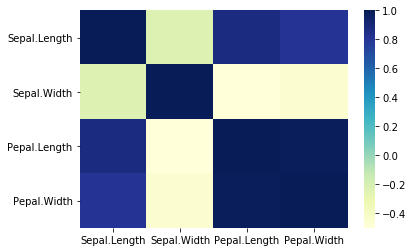

In [9]:
import seaborn as sns
import matplotlib.style as style
# style.use("fivethirtyeight")
sns.heatmap(dataset_train.corr(),cmap='YlGnBu')

In [94]:
from sklearn.linear_model import LinearRegression
import numpy as np
line_reg = LinearRegression()
tmp=dataset_train
y_train=np.log1p(tmp.pop("Pepal.Length"))
x_train=tmp
x_train

,Sepal.Length,Sepal.Width,Pepal.Width,Species
0,5.1,3.5,0.2,setosa
3,4.6,3.1,0.2,setosa
5,4.6,3.2,0.2,setosa
7,5.0,3.3,0.2,setosa
8,7.0,3.2,1.4,versicolor
10,6.3,3.3,2.5,virginica
11,5.8,2.7,1.9,virginica
13,6.3,2.9,1.8,virginica


In [95]:
# 独热编码
pd.get_dummies(x_train['Species'], prefix='Species').head()

,Species_setosa,Species_versicolor,Species_virginica
0,1,0,0
3,1,0,0
5,1,0,0
7,1,0,0
8,0,1,0


In [96]:
x_train=pd.get_dummies(x_train)
x_train

,Sepal.Length,Sepal.Width,Pepal.Width,Species_setosa,Species_versicolor,Species_virginica
0,5.1,3.5,0.2,1,0,0
3,4.6,3.1,0.2,1,0,0
5,4.6,3.2,0.2,1,0,0
7,5.0,3.3,0.2,1,0,0
8,7.0,3.2,1.4,0,1,0
10,6.3,3.3,2.5,0,0,1
11,5.8,2.7,1.9,0,0,1
13,6.3,2.9,1.8,0,0,1


In [97]:
line_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
line_reg.intercept_

0.9093043320607699

In [99]:
line_reg.coef_

array([ 0.15633679, -0.1995122 ,  0.23313542, -0.17117971,  0.0488538 ,
        0.12232591])

In [100]:
data_pred=data[np.isnan(data["Pepal.Length"])]
data_pred=data_pred.dropna(subset=["Sepal.Width","Sepal.Length"])
data_pred

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width,Species
1,4.9,3.0,NaN,0.2,setosa
2,4.7,3.2,NaN,0.2,setosa
4,5.1,3.8,NaN,0.2,setosa
9,6.4,3.2,NaN,1.5,versicolor
14,5.9,3.0,NaN,1.8,virginica


In [101]:
X_pred=pd.get_dummies(data_pred)
np.log1p(X_pred.pop("Pepal.Length"))
y_pred=line_reg.predict(X_pred)
y_pred

array([0.95226535, 0.88109555, 0.82392295, 1.66997764, 1.77512442])

In [102]:
data_pred["Pepal.Length"]=y_pred
data_pred

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width,Species
1,4.9,3.0,0.952265,0.2,setosa
2,4.7,3.2,0.881096,0.2,setosa
4,5.1,3.8,0.823923,0.2,setosa
9,6.4,3.2,1.669978,1.5,versicolor
14,5.9,3.0,1.775124,1.8,virginica


In [133]:
dataset_train=data.dropna()
dataset_train
data_new=dataset_train.append(data_pred).sort_index()
data_new

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width,Species
0,5.1,3.5,1.400000,0.2,setosa
1,4.9,3.0,0.952265,0.2,setosa
2,4.7,3.2,0.881096,0.2,setosa
3,4.6,3.1,1.500000,0.2,setosa
4,5.1,3.8,0.823923,0.2,setosa
5,4.6,3.2,1.400000,0.2,setosa
7,5.0,3.3,1.400000,0.2,setosa
8,7.0,3.2,4.700000,1.4,versicolor
9,6.4,3.2,1.669978,1.5,versicolor
10,6.3,3.3,6.000000,2.5,virginica


In [21]:
data=pd.read_csv("lab_test4.csv")
data1=data.dropna(axis=1)
data1

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,151.5,18.5
3,180.8,12.9
4,8.7,7.2


In [22]:
data.dropna(axis=0)

,TV,radio,newspaper,sales
0,230.1,39.8,69.2,22.1
2,151.5,41.3,58.5,18.5
4,8.7,48.9,75.0,7.2


In [23]:
data3=data.fillna(0)
data3

,TV,radio,newspaper,sales
0,230.1,39.8,69.2,22.1
1,44.5,0.0,0.0,10.4
2,151.5,41.3,58.5,18.5
3,180.8,0.0,0.0,12.9
4,8.7,48.9,75.0,7.2


In [24]:
data4=data.fillna(method="pad")
data4

,TV,radio,newspaper,sales
0,230.1,39.8,69.2,22.1
1,44.5,39.8,69.2,10.4
2,151.5,41.3,58.5,18.5
3,180.8,41.3,58.5,12.9
4,8.7,48.9,75.0,7.2


In [25]:
data5=data.fillna(data.mean())
data5

,TV,radio,newspaper,sales
0,230.1,39.800000,69.200000,22.1
1,44.5,43.333333,67.566667,10.4
2,151.5,41.300000,58.500000,18.5
3,180.8,43.333333,67.566667,12.9
4,8.7,48.900000,75.000000,7.2


In [26]:
data6=data.fillna(data.median())
data6

,TV,radio,newspaper,sales
0,230.1,39.8,69.2,22.1
1,44.5,41.3,69.2,10.4
2,151.5,41.3,58.5,18.5
3,180.8,41.3,69.2,12.9
4,8.7,48.9,75.0,7.2


In [27]:
data7=data.fillna(data.mode())
data7

,TV,radio,newspaper,sales
0,230.1,39.8,69.2,22.1
1,44.5,41.3,69.2,10.4
2,151.5,41.3,58.5,18.5
3,180.8,NaN,NaN,12.9
4,8.7,48.9,75.0,7.2


In [28]:
from numpy import *

dataSet = array([[1.0, 0.9], [1.0, 1.0], [0.1, 0.2], [0.0, 0.1]])
labels = ['A','A','B','B']
print(dataSet)
print(labels)

numSamples = dataSet.shape[0]
new_t = array([0.2,0.7])

diff = tile(new_t,(numSamples,1))-dataSet
squreDiff = diff**2
squreDist = sum(squreDiff, axis=1)
distance = squreDist ** 0.5
print(distance)

sortedDistIndices = argsort(distance)

print(sortedDistIndices)
classCount = {}
K = 4
for i in range(K):
    voteLabel = labels[sortedDistIndices[i]]
    print(voteLabel)
    classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
print(classCount)

maxCount = 0
for k, v in classCount.items():
    if v > maxCount:
        maxCount = v
        maxIndex = k

print("Your input is:", new_t, "and classified to class: ", maxIndex)


[[1.  0.9]
 [1.  1. ]
 [0.1 0.2]
 [0.  0.1]]
['A', 'A', 'B', 'B']
[0.82462113 0.85440037 0.50990195 0.63245553]
[2 3 0 1]
B
B
A
A
{'B': 2, 'A': 2}
Your input is: [0.2 0.7] and classified to class:  B
